# Imports

In [1]:
# Import standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# API
import requests
import json
import os
# from sodapy import Socrata

# Datetime
import datetime as datetime

In [3]:
import snowflake.connector
import pandas as pd
# Gets the cursor
con = snowflake.connector.connect(
    user='meagan',
    password='Neutron123$%^',
    account='hu40871.us-east-1',
    warehouse='ANALYSIS'
    )
cur = con.cursor()

In [4]:
# insert query here
cur.execute('''
    SELECT  * 
    FROM    "WAREHOUSE"."GOLD"."SUBSCRIPTION_RETENTION"
           ''')

In [5]:
# reads data into pandas
df = cur.fetch_pandas_all()
df.head()

NotSupportedError: Unknown error

In [30]:
# import pyvenv
# import snowflake.connector as snow
# from snowflake.connector.pandas_tools import write_pandas
# import pyarrow

In [9]:
# # Gets the version
# conn = snow.connect(
#     user='meagan',
#     password='Neutron123$%^',
#     account='hu40871.us-east-1',
#     warehouse="ANALYSIS",
#     database="WAREHOUSE",
# #     schema="SUBSCRIPTION_RETENTION"
#     )
# cur = conn.cursor()
# print(conn)

# cur.execute("SHOW DATABASES")

# for db in cur:
#     print(db)

In [10]:
# Execute a statement that will generate a result set WAREHOUSE.GOLD.SUBSCRIPTION_RETENTION
# sql = "select * from GOLD.SUBSCRIPTION_RETENTION"
# cur.execute(sql)

## Acuity

In [8]:
silver = pd.read_csv('SILVER_FACT.ACUITY_ND_CONSULT_EVENTS.csv')
silver.head()

,EVENT_TS,EVENT_TS_UTC,ANONYMOUS_ID,EVENT,APPOINTMENT_BODY_CALENDAR,APPOINTMENT_BODY_FIRST_NAME,APPOINTMENT_BODY_DATETIME_CREATED,APPOINTMENT_BODY_CALENDAR_ID,APPOINTMENT_BODY_CALENDAR_TIMEZONE,EMAIL,APPOINTMENT_BODY_DATE,APPOINTMENT_BODY_DURATION,APPOINTMENT_BODY_TIMEZONE,APPOINTMENT_DATE_TIME,APPOINTMENT_BODY_LAST_NAME,APPOINTMENT_BODY_TYPE,APPOINTMENT_BODY_ID,APPOINTMENT_TYPE_ID,APPOINTMENT_BODY_CANCELED,APPOINTMENT_BODY_NO_SHOW
0,2020-12-23 23:45:03.646,2020-12-24 07:45:03.646,495876669,appointment_scheduled,"Dr. Anya Arthen, ND",Hunter,2020-12-24 01:45:00.000,3513713.0,America/New_York,hunterelliott510@gmail.com,"December 29, 2020",20.0,America/Los_Angeles,2020-12-29 14:25:00.000,Elliott,Hair Consultation,495876669.0,12047150.0,False,NaN
1,2021-01-03 00:03:41.860,2021-01-03 08:03:41.860,499867827,appointment_scheduled,"Dr. Nicole Klughers, ND",Kathleen,2021-01-03 02:03:40.000,3513704.0,America/New_York,katmc@sbcglobal.net,"January 21, 2021",20.0,America/Los_Angeles,2021-01-21 17:00:00.000,McElhinney,Hair Consultation,499867827.0,12799707.0,False,NaN
2,2020-12-27 21:34:32.762,2020-12-28 05:34:32.762,496859072,appointment_scheduled,"Dr. Nadia Musavvir, ND",ashley,2020-12-27 23:34:29.000,3513708.0,America/Chicago,ashleynizzle@yahoo.com,"January 6, 2021",20.0,America/Chicago,2021-01-06 12:30:00.000,patkovic,Hair Consultation,496859072.0,12799707.0,False,NaN
3,2020-11-27 03:05:47.644,2020-11-27 11:05:47.644,481523073,appointment_scheduled,"Dr. Ariana Zastrow, ND",Rose,2020-11-27 05:05:44.000,3684820.0,America/New_York,foxbody1986@hotmail.com,"December 7, 2020",20.0,America/New_York,2020-12-07 16:55:00.000,DeLaRosa,Hair Consultation,481523073.0,12047150.0,False,NaN
4,2020-12-08 03:30:31.906,2020-12-08 11:30:31.906,487457386,appointment_scheduled,"Dr. Ariana Zastrow, ND",Anita,2020-12-08 05:30:28.000,3684820.0,America/New_York,anbavitz@gmail.com,"December 22, 2020",20.0,America/New_York,2020-12-22 12:25:00.000,Bavitz,Hair Consultation,487457386.0,12047150.0,False,NaN


In [38]:
# Create a copy of the dataframe to preserve the content of the API export during cleaning
silver_acuity = silver.copy()
silver_acuity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18257 entries, 0 to 18256
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EVENT_TS                            18257 non-null  object 
 1   EVENT_TS_UTC                        18257 non-null  object 
 2   ANONYMOUS_ID                        18257 non-null  int64  
 3   EVENT                               18257 non-null  object 
 4   APPOINTMENT_BODY_CALENDAR           17979 non-null  object 
 5   APPOINTMENT_BODY_FIRST_NAME         17979 non-null  object 
 6   APPOINTMENT_BODY_DATETIME_CREATED   17979 non-null  object 
 7   APPOINTMENT_BODY_CALENDAR_ID        17979 non-null  float64
 8   APPOINTMENT_BODY_CALENDAR_TIMEZONE  17979 non-null  object 
 9   EMAIL                               17921 non-null  object 
 10  APPOINTMENT_BODY_DATE               17979 non-null  object 
 11  APPOINTMENT_BODY_DURATION           17979

In [39]:
# Change dates to datetime Dtype
silver_acuity['APPOINTMENT_BODY_DATE'] = pd.to_datetime(silver_acuity['APPOINTMENT_BODY_DATE'])
# silver_acuity.columns

In [45]:
# Drop unneeded columns
silver_acuity.drop(columns=['EVENT_TS', 'EVENT_TS_UTC', 'ANONYMOUS_ID','APPOINTMENT_BODY_FIRST_NAME',
       'APPOINTMENT_BODY_DATETIME_CREATED', 'APPOINTMENT_BODY_CALENDAR_ID','APPOINTMENT_BODY_CALENDAR_TIMEZONE',\
                    'APPOINTMENT_BODY_TIMEZONE', 'APPOINTMENT_BODY_LAST_NAME', 'APPOINTMENT_BODY_ID',\
                    'APPOINTMENT_BODY_NO_SHOW', \
                    'APPOINTMENT_TYPE_ID'], inplace=True)

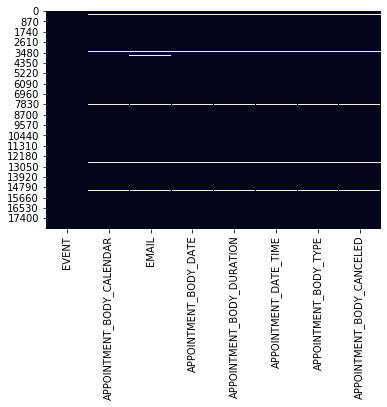

In [46]:
# Check for null values
sns.heatmap(silver_acuity.isnull(), cbar=False)

In [ ]:
silver_acuity['EVENT'].value_counts()

In [48]:
# drop irrelevant appointments

na_dict= {'appointment_canceled' : np.nan,
'appointment_changed' : np.nan,
'appointment_rescheduled' : np.nan}

silver_acuity['EVENT'].replace(na_dict, inplace = True)
silver_acuity.dropna(inplace = True)
silver_acuity['EVENT'].value_counts()

appointment_scheduled    3729
Name: EVENT, dtype: int64

In [49]:
# Rearrange columns for easier data visualization

# violation_df = violation_df[[ 'Plate','time_issued', 'Fine_Amount', 'Amount_Due', 'Payment_Amount',
#        'Precinct', 'County', 'State']]
# violation_df.head()

In [19]:
# Create dummy variables

violation_df['weekday'] = violation_df['time_issued'].dt.weekday
county_dummies = pd.get_dummies(violation_df['County'], prefix='County')
weekday_dummies = pd.get_dummies(violation_df['weekday'], prefix='weekday')
violation_df = pd.concat([violation_df, county_dummies, weekday_dummies], axis=1)
violation_df.drop(columns =['County','weekday'], inplace=True)
violation_df.columns

Index(['Plate', 'time_issued', 'Fine_Amount', 'Amount_Due', 'Payment_Amount',
       'Precinct', 'State', 'County_BX', 'County_K', 'County_NY', 'County_Q',
       'County_R', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [20]:
# Rename counties to be more recognizable

violation_df.rename(columns={'County_BX':'Bronx', 'County_K':'Brooklyn', \
                             'County_NY':'Manhattan', 'County_Q':'Queens', \
                             'County_R':'Staten_Island'}, inplace=True)

In [21]:
# Make state plates a binary

violation_df.loc[violation_df['State'] =='NY', 'State']= 1

out_of_state = {'FL':0, 'NJ':0, 'MI':0, 'RI':0, 'PA':0, 'VA':0, 'ME':0, 'CT':0, 'NC':0, 'AL':0,
       'TX':0, 'IL':0, 'MA':0, 'WI':0, 'IN':0, 'GV':0, 'NH':0, 'OH':0, '99':0, 'AZ':0, 'CA':0,
       'SC':0, 'LA':0, 'GA':0, 'VT':0, 'OR':0, 'MD':0, 'SD':0, 'MO':0, 'DE':0, 'WV':0, 'OK':0,
       'ON':0, 'CO':0, 'AR':0, 'AK':0, 'QB':0, 'WA':0, 'MT':0, 'NV':0, 'UT':0, 'TN':0, 'DC':0, 'YT':0,
       'NE':0, 'KY':0, 'IA':0, 'MN':0, 'ID':0, 'KS':0, 'ND':0, 'MS':0, 'NM':0, 'WY':0, 'HI':0, 'NF':0,
       'MX':0, 'DP':0, 'AB':0, 'NS':0, 'BC':0, 'PR':0, 'NB':0, 'FO':0, 'MB':0, 'PE':0, 'SK':0, 'NT':0}

violation_df['State'].replace(out_of_state, inplace = True)
violation_df['State'].value_counts()

1    3809378
0    1203324
Name: State, dtype: int64

In [22]:
# Rename Precint column

violation_df.rename(columns={'Precinct':'precinct'}, inplace=True)
violation_df.head()

,Plate,time_issued,Fine_Amount,Amount_Due,Payment_Amount,precinct,State,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
9668,KYM0585,2019-12-31 10:26:00,45.0,75.0,75.0,63.0,0,0,1,0,0,0,0,1,0,0,0,0,0
9669,3247071,2019-12-31 10:22:00,45.0,55.0,55.0,63.0,0,0,1,0,0,0,0,1,0,0,0,0,0
9670,2FWQ91,2019-12-31 10:15:00,45.0,55.0,55.0,63.0,0,0,1,0,0,0,0,1,0,0,0,0,0
9671,JDP9488,2019-12-31 10:05:00,45.0,75.0,75.0,63.0,1,0,1,0,0,0,0,1,0,0,0,0,0
9672,5TM825,2019-12-31 09:59:00,45.0,75.0,75.0,63.0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [23]:
# Remove null values

zero_dict = {0: np.nan}
violation_df['precinct'].replace(zero_dict, inplace = True)
violation_df.dropna(inplace = True)

violation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5010716 entries, 9668 to 6791282
Data columns (total 19 columns):
 #   Column          Dtype         
---  ------          -----         
 0   Plate           object        
 1   time_issued     datetime64[ns]
 2   Fine_Amount     float64       
 3   Amount_Due      float64       
 4   Payment_Amount  float64       
 5   precinct        float64       
 6   State           int64         
 7   Bronx           uint8         
 8   Brooklyn        uint8         
 9   Manhattan       uint8         
 10  Queens          uint8         
 11  Staten_Island   uint8         
 12  weekday_0       uint8         
 13  weekday_1       uint8         
 14  weekday_2       uint8         
 15  weekday_3       uint8         
 16  weekday_4       uint8         
 17  weekday_5       uint8         
 18  weekday_6       uint8         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1), uint8(12)
memory usage: 363.2+ MB


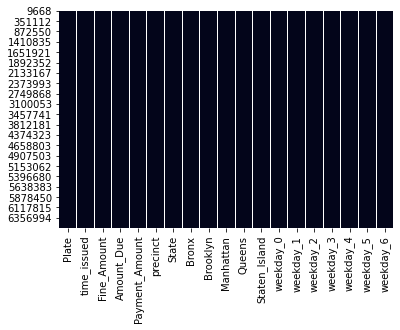

In [24]:
# Check for null values

sns.heatmap(violation_df.isnull(), cbar=False)

In [25]:
# View head before exporting as csv

violation_df.head()

,Plate,time_issued,Fine_Amount,Amount_Due,Payment_Amount,precinct,State,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
9668,KYM0585,2019-12-31 10:26:00,45.0,75.0,75.0,63.0,0,0,1,0,0,0,0,1,0,0,0,0,0
9669,3247071,2019-12-31 10:22:00,45.0,55.0,55.0,63.0,0,0,1,0,0,0,0,1,0,0,0,0,0
9670,2FWQ91,2019-12-31 10:15:00,45.0,55.0,55.0,63.0,0,0,1,0,0,0,0,1,0,0,0,0,0
9671,JDP9488,2019-12-31 10:05:00,45.0,75.0,75.0,63.0,1,0,1,0,0,0,0,1,0,0,0,0,0
9672,5TM825,2019-12-31 09:59:00,45.0,75.0,75.0,63.0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [26]:
# Export data

violation_df.to_csv('Tickets_Data.csv')